##Installing and importing the necessary libraries

In [2]:
!pip install snscrape
!pip install newspaper3k
!pip install googletrans==4.0.0-rc1
!pip install langdetect
!pip install lxml[html_clean]
!pip install deep_translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 68.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 6.7 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13540 sha256=d53f3beebc18ca9ed0697825b00dd9ad0fbc3611c08004c31a41bdac5f201cf0
  Stored in directory: /root/.cache/pip/wheels/fc/ab/f8/cce3a9ae6d828bd346be695f7ff54612cd22b7cbd7208d68f3
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3341 sha256=b0154bfc281f2f5b16f383746c7f6af392ac8e3051ddda4d7ebf71a13ddd5bf5
  Stored in 

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import snscrape.modules.twitter as sntwitter
import time
from newspaper import Article
from googletrans import Translator
from langdetect import detect, LangDetectException
import pandas as pd
from google.colab import files
from googletrans import Translator
from google.colab import drive
from deep_translator import GoogleTranslator
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Scraping of articles from the net

In [7]:
#we start by creating and empty list
web_articles_list = []

urls = [
     "https://allafrica.com/stories/202412050450.html",
     "https://www.newtimes.co.rw/article/22302/news/infrastructure/public-transport-kigali-to-pilot-distance-based-payment-system?utm_source=chatgpt.com",
     "https://www.newtimes.co.rw/article/22410/news/rwanda/with-new-payment-system-commuters-in-kigali-may-spend-less-on-public-transport",
     "https://rwandainspirer.com/advocates-urge-pay-per-distance-model-amid-public-transport-fare-hike/?utm_source=chatgpt.com",
     "https://allafrica.com/stories/202403140480.html?utm_source=chatgpt.com",
     "https://magazine.eaur.ac.rw/rura-to-pilot-distance-based-fare-system-in-kigali-public-transport/",
     "https://livinginkigali.com/transport-in-kigali/",
     "https://www.ktpress.rw/2020/10/new-transport-fares-what-you-need-to-know/",
     "https://rwandatoday.africa/rwanda/business/public-transport-users-cry-foul-over-e-billing-system-2472164",
     "https://www.topafricanews.com/2024/12/02/pay-as-you-go-distance-based-fare-pilot-to-launch-in-kigali-public-transport/?q=le-president-ndayishimiye-prone-les-actions-apportant-des-progres-tangibles-pour-le-pays&pr=335193&lang=en",
     "https://furtherafrica.com/2024/12/09/rwanda-rolls-out-distance-based-public-transport-fare-system/"

]

for url in urls:
    article = Article(url)
    article.download()
    article.parse()
    article.nlp() #to extract keywords too

    web_articles_list.append({
        'source': 'web',
        'url': url,
        'title': article.title,
        'publish_date': article.publish_date,
        'content': article.text,
        'lang': 'en'
    })
    print(f"Scraped article from: {url}")
    time.sleep(1) #to add 1s delay between requests

print(f"Found {len(web_articles_list)} articles from the list of provided URLs.")

Scraped article from: https://allafrica.com/stories/202412050450.html
Scraped article from: https://www.newtimes.co.rw/article/22302/news/infrastructure/public-transport-kigali-to-pilot-distance-based-payment-system?utm_source=chatgpt.com
Scraped article from: https://www.newtimes.co.rw/article/22410/news/rwanda/with-new-payment-system-commuters-in-kigali-may-spend-less-on-public-transport
Scraped article from: https://rwandainspirer.com/advocates-urge-pay-per-distance-model-amid-public-transport-fare-hike/?utm_source=chatgpt.com
Scraped article from: https://allafrica.com/stories/202403140480.html?utm_source=chatgpt.com
Scraped article from: https://magazine.eaur.ac.rw/rura-to-pilot-distance-based-fare-system-in-kigali-public-transport/
Scraped article from: https://livinginkigali.com/transport-in-kigali/
Scraped article from: https://www.ktpress.rw/2020/10/new-transport-fares-what-you-need-to-know/
Scraped article from: https://rwandatoday.africa/rwanda/business/public-transport-user

In [8]:
#to visualize one item in the list of scrapped articles
web_articles_list[0]

{'source': 'web',
 'url': 'https://allafrica.com/stories/202412050450.html',
 'title': 'Rwanda: Commuters All Smiles As Kigali Launches Distance-Based Fare System',
 'publish_date': datetime.datetime(2024, 12, 5, 12, 12, 5, tzinfo=tzlocal()),
 'content': 'Commuters were all smiles on Wednesday December 4, after Rwanda Utilities Regulatory Authority (RURA) unveiled a pay-per-distance fare system for public buses in Kigali, replacing the flat-rate pricing system that had been in used for years.\n\nThe new system, which began with the Kabuga-Downtown and Nyabugogo-Kabuga bus routes, will be rolled out to all the routes in Kigali before the end of the year.\n\nALSO READ: Public transport: Kigali to pilot distance-based payment system\n\nAs someone who experienced the new fare payment system firsthand, I can confidently say it\'s a game-changer for passengers. Here\'s how it works.\n\nWhen boarding the bus, you must first select your journey route, say Kabuga-Downtown, by tapping the card o

##Importing and translating the comments in Kinyarwanda to english

In [9]:
#Importing and translating the kinyarwanda file in english
drive.mount('/content/drive')
text = '/content/drive/My Drive/Colab Notebooks/Hackathon_2025_sentiment_analysis/Comments_rw.txt'
with open(text, 'r', encoding='utf-8') as f:
    kinyarwanda_text = f.read()

translated_text = GoogleTranslator(source='rw', target='en').translate(kinyarwanda_text)

#Save the translated text to a new file
output_text = f'{text}_translated.txt'
with open(output_text, 'w', encoding='utf-8') as j:
    j.write(translated_text)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#we join translated_text and web_articles_list
translated_article = {
    "source": "manual_upload_from_Twitter",
    "url": None,
    "title": "Translated Article from Kinyarwanda to english",
    "publish_date": None,
    "content": translated_text,
    "lang": "en"
}

#We add it to the list
web_articles_list.append(translated_article)

In [11]:
#to visualize the translated comments from Twitter
web_articles_list[-1]


{'source': 'manual_upload_from_Twitter',
 'url': None,
 'title': 'Translated Article from Kinyarwanda to english',
 'publish_date': None,
 'content': 'Twitter: \n\nUser @ Iremmy15: Nice Neza @Ruwa_Rwanda Mense Mwiba Mense Members About Prices by Saying Cars from Education Really\n\nUser @ Etiennemurenge1: Only a person who is going to have full of journey, as it can lead to more than one journey on the map, which would go to the tobacco. Hope you learned it too\n\nuser @ yUmireyirizire73240: Thank You @Rura_Rwanda, This was avery Waited change.\n\nUser @ frodu1katabarwa: Very good 👍👏\n\nUser @isi_siyaso: MutahamuNe mutiye buses enough, which you said would not be available\n\nuser @hapfimbbwishumit: oh this really check it because he drives it on the way you go to the card and cut them 2 cg bakanga\n\nUser @ dadyankee42: Hi!\n\nDon\'t go to the agency to carry students who went to the vacance that they were going to do with no friends, when the students took them they would pay a doubl

#Transforming my list into a dataset while splitting each article per sentence

In [12]:
#We create an empty list to hold sentence-level entries
sentence_data = []

for article in web_articles_list:
    sentences = sent_tokenize(article["content"])
    for sentence in sentences:
        sentence_data.append({
            "source": article["source"],
            "url": article["url"],
            "title": article["title"],
            "publish_date": article["publish_date"],
            "sentence": sentence,
            "lang": article["lang"]
        })

#we build the dataframe
sentence_df = pd.DataFrame(sentence_data)
sentence_df.head()


,source,url,title,publish_date,sentence,lang
0,web,https://allafrica.com/stories/202412050450.html,Rwanda: Commuters All Smiles As Kigali Launche...,2024-12-05 12:12:05+00:00,Commuters were all smiles on Wednesday Decembe...,en
1,web,https://allafrica.com/stories/202412050450.html,Rwanda: Commuters All Smiles As Kigali Launche...,2024-12-05 12:12:05+00:00,"The new system, which began with the Kabuga-Do...",en
2,web,https://allafrica.com/stories/202412050450.html,Rwanda: Commuters All Smiles As Kigali Launche...,2024-12-05 12:12:05+00:00,ALSO READ: Public transport: Kigali to pilot d...,en
3,web,https://allafrica.com/stories/202412050450.html,Rwanda: Commuters All Smiles As Kigali Launche...,2024-12-05 12:12:05+00:00,Here's how it works.,en
4,web,https://allafrica.com/stories/202412050450.html,Rwanda: Commuters All Smiles As Kigali Launche...,2024-12-05 12:12:05+00:00,"When boarding the bus, you must first select y...",en


In [13]:
#shape of the data set
sentence_df.shape

(335, 6)

Our dataset contains 335 observations with 6 features.

In [14]:
#Tail of our dataset
sentence_df.tail()

,source,url,title,publish_date,sentence,lang
330,manual_upload_from_Twitter,None,Translated Article from Kinyarwanda to english,None,User @AfRosaxon: If traffic is eased up at tha...,en
331,manual_upload_from_Twitter,None,Translated Article from Kinyarwanda to english,None,User @ tirus56131185: this is what happens whe...,en
332,manual_upload_from_Twitter,None,Translated Article from Kinyarwanda to english,None,Alteast makes 4 and reserves ENOUGH Space / On...,en
333,manual_upload_from_Twitter,None,Translated Article from Kinyarwanda to english,None,Build Kigali of 1000 years Not for 10 Projects...,en
334,manual_upload_from_Twitter,None,Translated Article from Kinyarwanda to english,None,RBA TV,en


##Preprocessing

In [15]:
#To gather the information on the dataset
sentence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   source        335 non-null    object
 1   url           299 non-null    object
 2   title         335 non-null    object
 3   publish_date  287 non-null    object
 4   sentence      335 non-null    object
 5   lang          335 non-null    object
dtypes: object(6)
memory usage: 15.8+ KB


We notice that we have some columns with null values (missing data), which is explained by the fact that certain observations are comments and were recorded manually, as I encountered many barriers while trying to scrape them from Twitter/X.

In [16]:
#Date at which the articles was uploaded
sentence_df["publish_date"].unique()

array([datetime.datetime(2024, 12, 5, 12, 12, 5, tzinfo=tzlocal()),
       datetime.datetime(2024, 12, 3, 6, 12, 47),
       datetime.datetime(2024, 12, 7, 8, 56, 45), None,
       datetime.datetime(2024, 3, 14, 17, 13, 35, tzinfo=tzlocal()),
       datetime.datetime(2024, 12, 2, 20, 28, 31, tzinfo=tzlocal()),
       datetime.datetime(2021, 9, 25, 5, 42, 2, tzinfo=tzlocal()),
       datetime.datetime(2020, 10, 15, 20, 28, 41, tzinfo=tzoffset(None, 7200)),
       datetime.datetime(2021, 6, 2, 18, 8, 12),
       datetime.datetime(2024, 12, 2, 0, 0),
       datetime.datetime(2024, 12, 9, 0, 0)], dtype=object)

We notice that most of the articles on the new distance-based fare pricing model in public transport were written towards the end of 2024. That is because the Rwanda Utilities Regulatory Agency (Rura) made the announcement regarding the situation on December 02nd 2024, with effects two days later.

In [17]:
#we remove redundant information
sentence_df.drop_duplicates()
sentence_df.shape

(335, 6)

The shape of the dataset didn't change, whcih indicate that there was no redundancy.

##Cleaning of the column "sentence" in our dataset

In [20]:
def clean(text):

    #to having only lowercase
    text = text.lower()

    #to remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)

    #to remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(rf"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'[^\w\s]', '', text)


    #to remove numbers as they don't provide any information for sentiment analysis
    text = re.sub(r'\d+', '', text)

    #to remove emojis
    emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F1E0-\U0001F1FF"  # flags
    "\U00002700-\U000027BF"  # dingbats
    "\U000024C2-\U0001F251"
    "]+",
    flags=re.UNICODE,)
    text = emoji_pattern.sub(r'', text)

    #we have to tokenize
    tokens = word_tokenize(text)

    #To rejoin
    cleaned_text = " ".join(tokens)

    return cleaned_text

#we apply the function to our dataset
sentence_df["cleaned_sentence"] = sentence_df["sentence"].apply(clean)


sentence_df[["sentence", "cleaned_sentence"]].tail()


,sentence,cleaned_sentence
330,User @AfRosaxon: If traffic is eased up at tha...,user afrosaxon if traffic is eased up at that ...
331,User @ tirus56131185: this is what happens whe...,user tirus this is what happens when there is ...
332,Alteast makes 4 and reserves ENOUGH Space / On...,alteast makes and reserves enough space one way
333,Build Kigali of 1000 years Not for 10 Projects...,build kigali of years not for projects to be d...
334,RBA TV,rba tv


In [21]:
#We remove rows with no information
sentence_df = sentence_df[sentence_df["cleaned_sentence"].str.strip() != ""]
sentence_df.shape

(326, 7)

After the cleaning process, we have 9 rows that are useless because they don't contain any information in the "cleaned_sentence" column.

##Sentiment Analysis

I am going to use VADER(Valence Aware Dictionary and Sentiment Reasoner) for my sentiment analysis because it is good for social media posts and informal english.

In [23]:
#We initiate the sentiment intensity analyzer
s= SentimentIntensityAnalyzer()

#we apply to your DataFrame
sentence_df["sentiment_score"] = sentence_df["cleaned_sentence"].apply(lambda x: s.polarity_scores(x)["compound"])

def classify_sentiment(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

sentence_df["sentiment_label"] = sentence_df["sentiment_score"].apply(classify_sentiment)
sentence_df.head()

,source,url,title,publish_date,sentence,lang,cleaned_sentence,sentiment_score,sentiment_label
0,web,https://allafrica.com/stories/202412050450.html,Rwanda: Commuters All Smiles As Kigali Launche...,2024-12-05 12:12:05+00:00,Commuters were all smiles on Wednesday Decembe...,en,commuters were all smiles on wednesday decembe...,0.5267,positive
1,web,https://allafrica.com/stories/202412050450.html,Rwanda: Commuters All Smiles As Kigali Launche...,2024-12-05 12:12:05+00:00,"The new system, which began with the Kabuga-Do...",en,the new system which began with the kabugadown...,0.0000,neutral
2,web,https://allafrica.com/stories/202412050450.html,Rwanda: Commuters All Smiles As Kigali Launche...,2024-12-05 12:12:05+00:00,ALSO READ: Public transport: Kigali to pilot d...,en,also read public transport kigali to pilot dis...,0.4767,positive
3,web,https://allafrica.com/stories/202412050450.html,Rwanda: Commuters All Smiles As Kigali Launche...,2024-12-05 12:12:05+00:00,Here's how it works.,en,heres how it works,0.0000,neutral
4,web,https://allafrica.com/stories/202412050450.html,Rwanda: Commuters All Smiles As Kigali Launche...,2024-12-05 12:12:05+00:00,"When boarding the bus, you must first select y...",en,when boarding the bus you must first select yo...,0.4019,positive


##Visualization

Sentiment Distribution accross the dataset

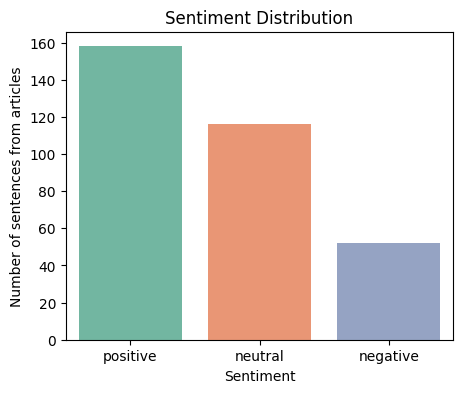

<Figure size 640x480 with 0 Axes>

In [40]:
#Barchart of the sentiment label
plt.figure(figsize=(5, 4))
sns.countplot(data=sentence_df, x="sentiment_label", palette="Set2", legend=False )
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of sentences from articles")
plt.show()
plt.savefig("/content/drive/My Drive/Colab Notebooks/Hackathon_2025_sentiment_analysis/Sentiment Distribution.png", dpi=300, bbox_inches='tight')


We notice that most articles and comments on social media gave a positive review on the introduction of the payment system. A high percentage of people was neutral about that change, which means that they might not be public transport's users or simply didn't note a substantial change.

Sentiment Distribution per article accross the dataset

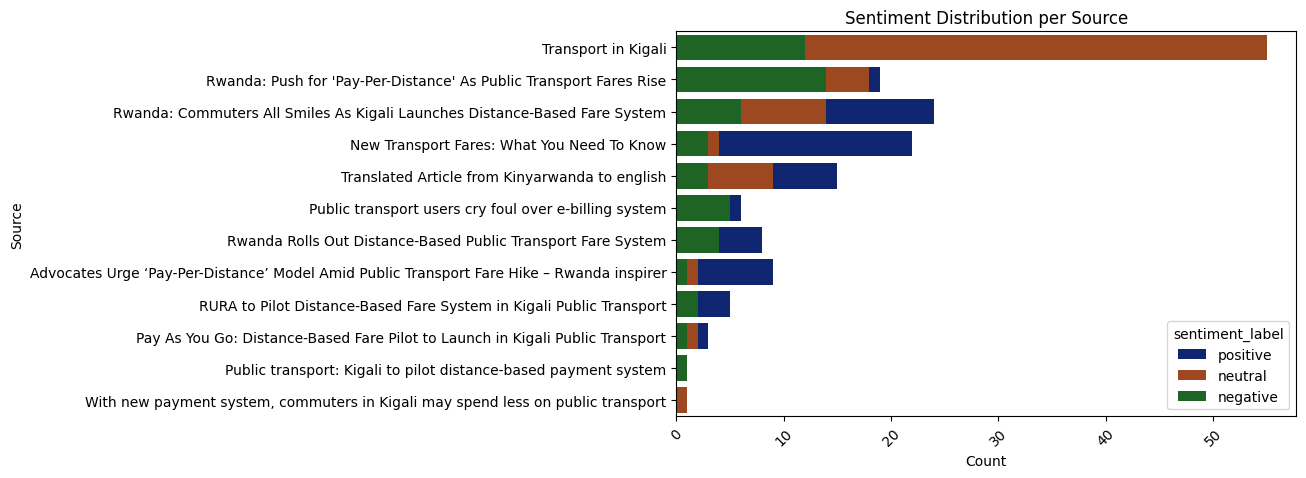

<Figure size 640x480 with 0 Axes>

In [38]:
#Barchat of different sentiment labels per source
plt.figure(figsize=(8, 5))
source_order = (
    sentence_df.groupby("title")
    .size()
    .sort_values(ascending=False)
    .index
)
sns.countplot(data=sentence_df, y="title", hue="sentiment_label", palette="dark",dodge=False,order=source_order)
plt.title("Sentiment Distribution per Source")
plt.xlabel("Count")
plt.ylabel("Source")
plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()
plt.savefig("/content/drive/My Drive/Colab Notebooks/Hackathon_2025_sentiment_analysis/Sentiment Distribution per source.png", dpi=300, bbox_inches='tight');

The article "Transport in Kigali" has the highest count of sentiment label but its content is mostly neutral, which means that editors or citizens that they interviewed where not too excited by the change in that tarrif. Maybe they are people who live far from main bus stations and they were still going to pay the same amount whether the fares were flat or distance-based.

Furthermore, we notice a huge excitement as most reactions are positive from the article "New Transport Fares: What You Need To Know". This may indicate a positive impact of the new tariff on the people who were interviewed by KTPRESS.

Finally, "Rwanda : Push for "pay-per-distance" as public transport fares rise" is the article with the most negative reviews. Policymakers at RURA might want to investigate in order to understand why, and propose better solutions to people interviewed by ALLAFRICA. Also, the stacked barchart of "Translated article from kinyarwanda to english" indicates that Twitter/X users were mostly either neutral or positive about this change.

Pie Chart of sentiment distribution

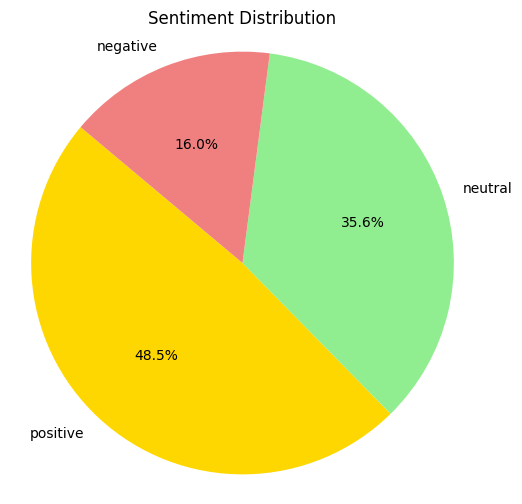

<Figure size 640x480 with 0 Axes>

In [42]:
#we Count the number of each sentiment label
label_counts = sentence_df['sentiment_label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['gold','lightgreen','lightcoral']
)

plt.title("Sentiment Distribution")
plt.axis('equal')
plt.show()
plt.savefig("/content/drive/My Drive/Colab Notebooks/Hackathon_2025_sentiment_analysis/Sentiment Distribution pie chart.png", dpi=300, bbox_inches='tight');

The pie chart represents the overall percentage of reactions in all the source and it is refreshing to see that almost half of them were positive and just a little proportion of the population had a negative thought about the implementation of the distance-based fare.

Stacked bar chart of sentiment per source

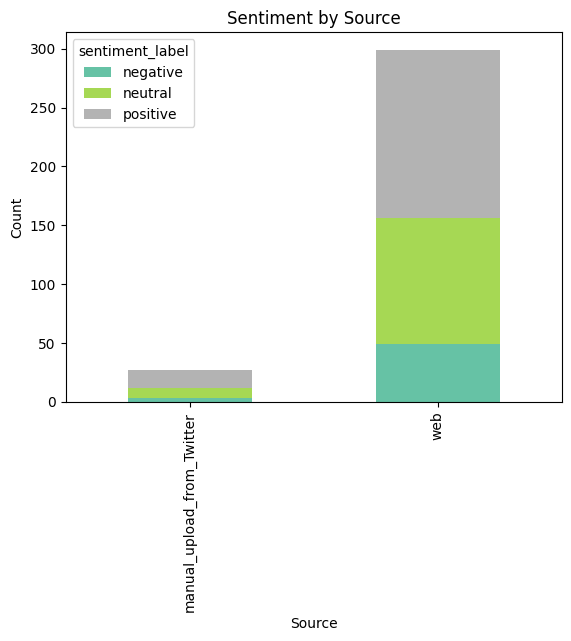

<Figure size 640x480 with 0 Axes>

In [43]:
#Stacked Bar Chart, sentiment per source
source_sentiment = sentence_df.groupby(['source', 'sentiment_label']).size().unstack(fill_value=0)
source_sentiment.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Sentiment by Source")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()
plt.savefig("/content/drive/My Drive/Colab Notebooks/Hackathon_2025_sentiment_analysis/Sentiment by Source.png", dpi=300, bbox_inches='tight');

The barchart above represents the distribution of sentiments over the main source of information we worked with, the web (online articles and Twitter/x comments). We are able to derive the same conclusion as before, reactions are mostly positive or neutral.

Wordcloud for the positive and negative classes

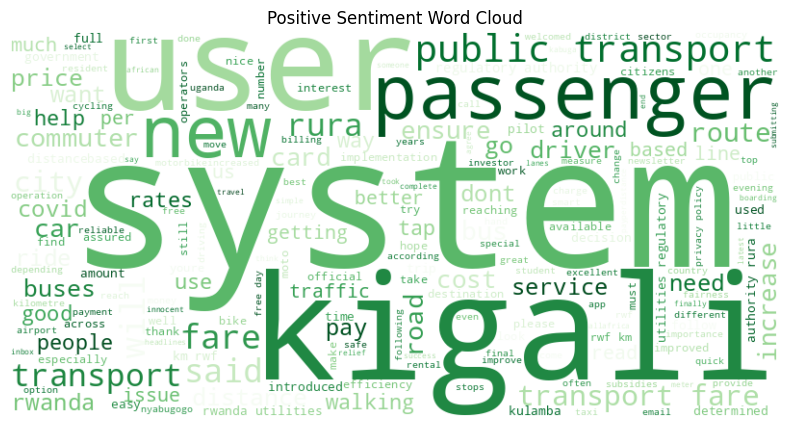

<Figure size 640x480 with 0 Axes>

In [48]:
positive_text = " ".join(sentence_df[sentence_df['sentiment_label'] == 'positive']['cleaned_sentence'])

wordcloud = WordCloud(background_color="white", colormap="Greens", width=800, height=400).generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment Word Cloud")
plt.show()
plt.savefig("/content/drive/My Drive/Colab Notebooks/Hackathon_2025_sentiment_analysis/Positive workcloud.png", dpi=300, bbox_inches='tight');

We use to wordcloud to represent the words with the highest frequency (in bigger font sizes) to lowest frequency (in lower font sizes). We notice that words like "kigali", "system", "new", "passenger","good","better","easy", "efficieny" (in small font size) are representative of the positiveness of the implementation of those new fares. I was expecting to see other keywords like "happy", "excited", "fair", "affordable", but this is not the case. The data is not essentially made of reactions of citizens but overall reactions reported in journals. Having access to data that best represent the sentiment of Rwandans regarding the topic would have been a boon to me.

In [46]:
print(f"Length of positive text: {len(positive_text)}")
print(positive_text[:500])  #we print first 500 characters

Length of positive text: 21196
commuters were all smiles on wednesday december after rwanda utilities regulatory authority rura unveiled a payperdistance fare system for public buses in kigali replacing the flatrate pricing system that had been in used for years also read public transport kigali to pilot distancebased payment system as someone who experienced the new fare payment system firsthand i can confidently say its a gamechanger for passengers when boarding the bus you must first select your journey route say kabugadow


The sentence above is the preview of the positive text out of the overall data and it has more than 20,000 characters.

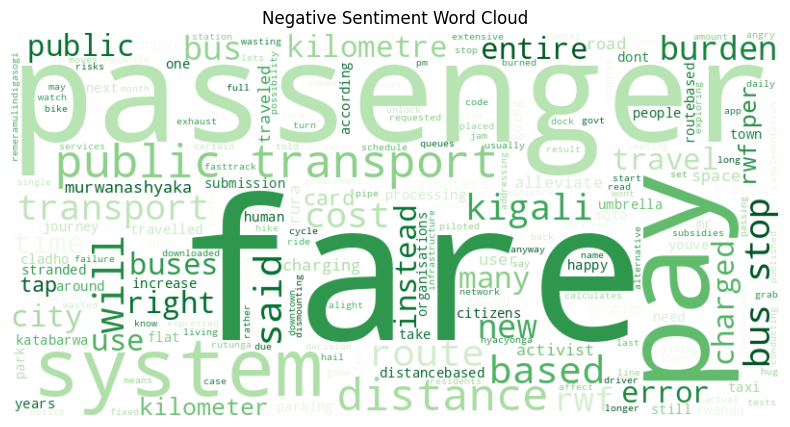

<Figure size 640x480 with 0 Axes>

In [49]:
negative_text = " ".join(sentence_df[sentence_df['sentiment_label'] == 'negative']['cleaned_sentence'])

WordCloud(background_color="white", colormap="Reds").generate(negative_text).to_image().show()
wordcloud_2 = WordCloud(background_color="white", colormap="Greens", width=800, height=400).generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment Word Cloud")
plt.show()
plt.savefig("/content/drive/My Drive/Colab Notebooks/Hackathon_2025_sentiment_analysis/Negative workcloud.png", dpi=300, bbox_inches='tight');

In this negative sentiment wordcloud, we denotes words like "fare", "passenger", "burden", "error", "cost" (which might indicate that public transport users still find the tariff expensive regardless), "instead", "stranded", "queues", and even "angry" (on top of burden) which indicate a negative emotion among the users. All these words would have been in bigger font sizes with a more representative data.

In [56]:
print(f"Length of negative text: {len(negative_text)}")
print(negative_text[:500])  #we print first 500 characters

Length of negative text: 6220
you pay rwf per kilometre as the bus moves the system calculates the actual fare based on the distance travelled in terms of kilometers and when you get off before the last stop in this case downtown you tap the card once again and you get back the unused amount error error there was a problem processing your submission with this new system passengers will no longer pay for the entire route but only for the kilometers they travel passengers travelling by public buses in kigali will pay fare base


The negative text seems to ask for clarification on whether the fare is calculated till the end the destination the user mentionned before the start of the trip even if they drop before their final destination (someone can change his/her mind and decide to drop before) or if they are going to received their remaning balance if they tap the card. That is something that RURA should communicate about for a best collaboration between all the stakeholders.

Sentiment score distribution

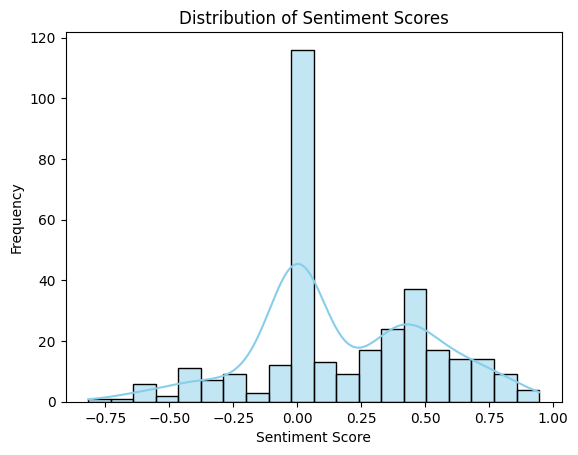

<Figure size 640x480 with 0 Axes>

In [51]:
sns.histplot(sentence_df["sentiment_score"], kde=True, bins=20, color="skyblue")
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()
plt.savefig("/content/drive/My Drive/Colab Notebooks/Hackathon_2025_sentiment_analysis/Distribution of Sentiment Scores.png", dpi=300, bbox_inches='tight');

We notice the highest peak near 0 and the second highest peak on the right side of the distribution. Which suggest that most people were either neutral or positive about the distance-based fare pricing model in public transport, replacing flat-rate fares. Nevertheless, some people were not sharing the same opinion and that is can be observed on the left side of the distribution.

Sentiment score by article

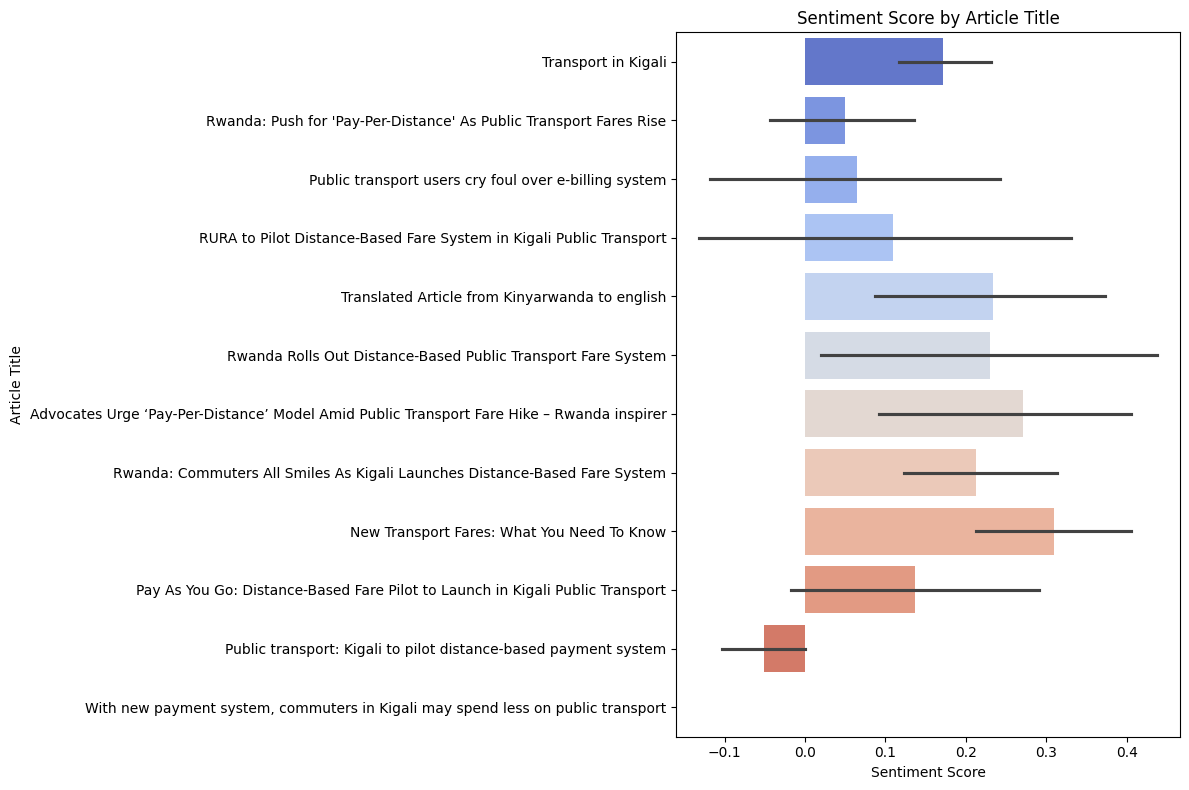

<Figure size 640x480 with 0 Axes>

In [52]:
sentence_df_sorted = sentence_df.sort_values("sentiment_score", ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(x="sentiment_score", y="title", data=sentence_df_sorted, palette="coolwarm")
plt.title("Sentiment Score by Article Title")
plt.xlabel("Sentiment Score")
plt.ylabel("Article Title")
plt.tight_layout()
plt.show()
plt.savefig("/content/drive/My Drive/Colab Notebooks/Hackathon_2025_sentiment_analysis/Sentiment score per article.png", dpi=300, bbox_inches='tight');

The graph above represents the sentiment score per article, the black lines indicate the positiveness of the sentiment. A long bar to the right indicate a positive one, a long bar to the left, a negative sentiment and a short bar around 0, a neutral sentiment.

Average sentiment per day

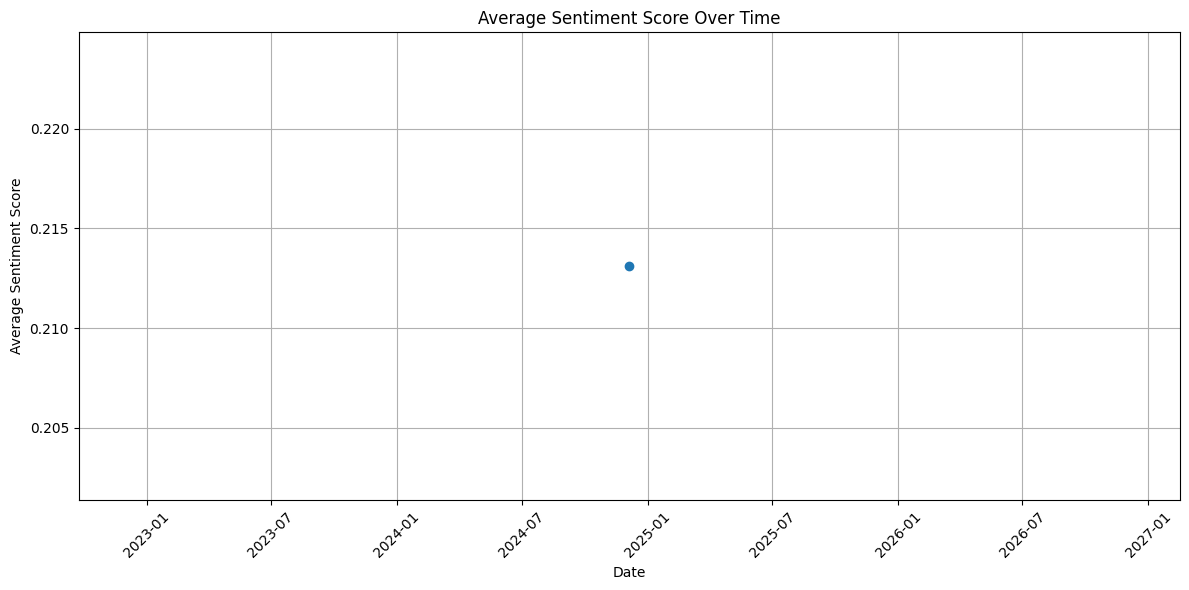

<Figure size 640x480 with 0 Axes>

In [53]:
#We set publish_date to datetime format
sentence_df['publish_date'] = pd.to_datetime(sentence_df['publish_date'],errors = 'coerce')

#Average sentiment per day
sentiment_over_time = sentence_df.groupby(sentence_df['publish_date'].dt.date)['sentiment_score'].mean()

plt.figure(figsize=(12,6))
plt.plot(sentiment_over_time.index, sentiment_over_time.values, marker='o')
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("/content/drive/My Drive/Colab Notebooks/Hackathon_2025_sentiment_analysis/Average sentiment per day.png", dpi=300, bbox_inches='tight');

What is observed in this picture may look questionable, but it represents the data. We worked with a small dataset and the reactions sparked by the change in cost of transport were all around December 2024. In other terms, newspapers and citizens discussed the topic around the time @RURA released the notice and didn't talk much about it later on. Which is normal, fresh information is being discussed a lot, and over time, other information is released, and people and media move on.

Had I had more time, I would have surveyed over a considerable time (more than 6 months), to ascertain the evolution of sentiments of people regarding the new Distance-based fare pricing model in public transport, replacing flat-rate fares. By doing so, we would have had a perfect graph to summarize sentiments over time.

Finally, the average sentiment score is close to 0.215 which is greater than 0.05 (of the VADER measurement), so overall the introduction of the new system was praised by Rwandans.

In [54]:
#we save the csv
sentence_df.to_csv("/content/drive/My Drive/Colab Notebooks/Hackathon_2025_sentiment_analysis/sentence_df.csv", index=False)

The second part of my work is about topic modeling and can be found on the next notebook.